In [2]:
# Accessing pre-processed data from wk6 hw
import pandas as pd


# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")


# Display first few rows to verify data
print(df.head())

             timestamp sensor_id              data_type  data_value  \
0  2025-06-03 18:41:59   SENS762                co2_ppm  433.043819   
1  2025-06-03 18:42:00   SENS762              pm25_ugm3   35.411776   
2  2025-06-03 18:42:01   SENS762          temperature_c   30.700000   
3  2025-06-03 18:42:02   SENS762       humidity_percent   64.600000   
4  2025-06-03 18:42:03   SENS762  soil_moisture_percent   28.800000   

   numeric_value  
0         433.04  
1          35.41  
2          30.70  
3          64.60  
4          28.80  


In [3]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
#df.sort_values("timestamp", inplace=True)

In [4]:
# Install Seaborn library first
!pip install seaborn

# Importing Required libraries for line plot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import timedelta
import math

In [5]:
# Setting the Visualization Style
sns.set(style="whitegrid")  # 'husl' = distinct colors

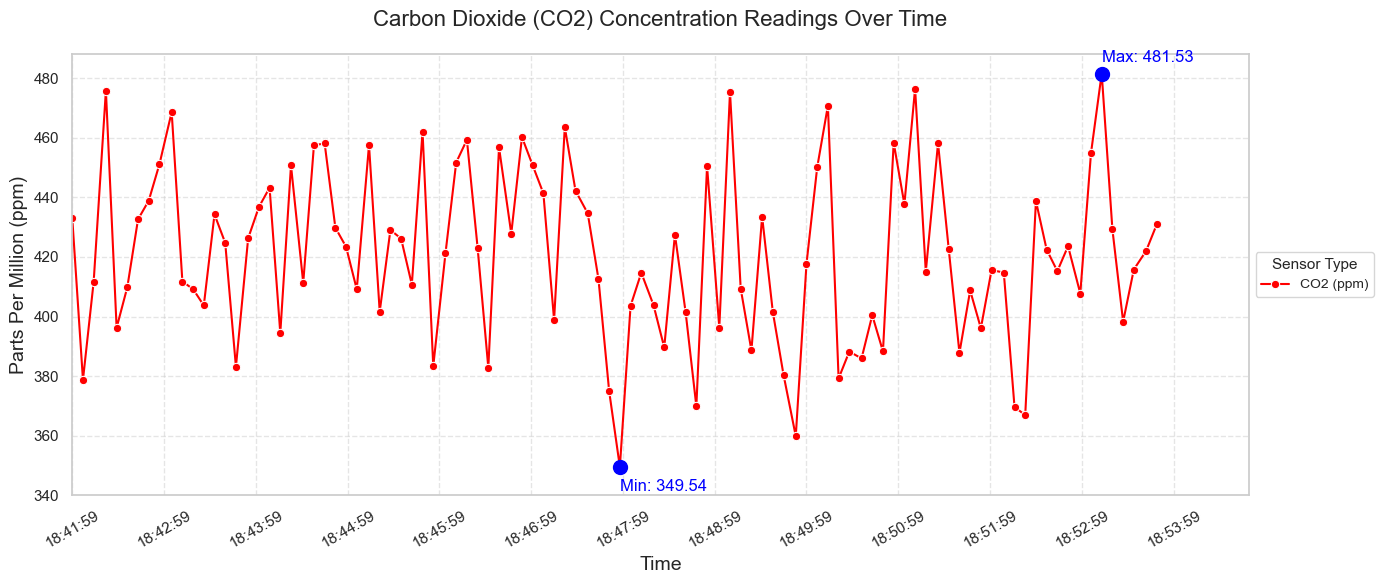

In [143]:
# Line Plot for co2_ppm

#Filter data type to co2_ppm
co2 = "co2_ppm"
co2_df = df[df["data_type"] == co2]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=co2_df, x="timestamp", y="numeric_value", color="red", marker="o", label="CO2 (ppm)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = co2_df.loc[co2_df["numeric_value"].idxmax()]
min_point = co2_df.loc[co2_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 4,
         f'Max: {max_point["numeric_value"]:.2f}', color="blue", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 8,
         f'Min: {min_point["numeric_value"]:.2f}', color="blue", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = co2_df["timestamp"].min()
end = co2_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = co2_df["numeric_value"].min()
y_origin = math.floor(min_y / 20) * 20
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Carbon Dioxide (CO2) Concentration Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Parts Per Million (ppm)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("co2_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

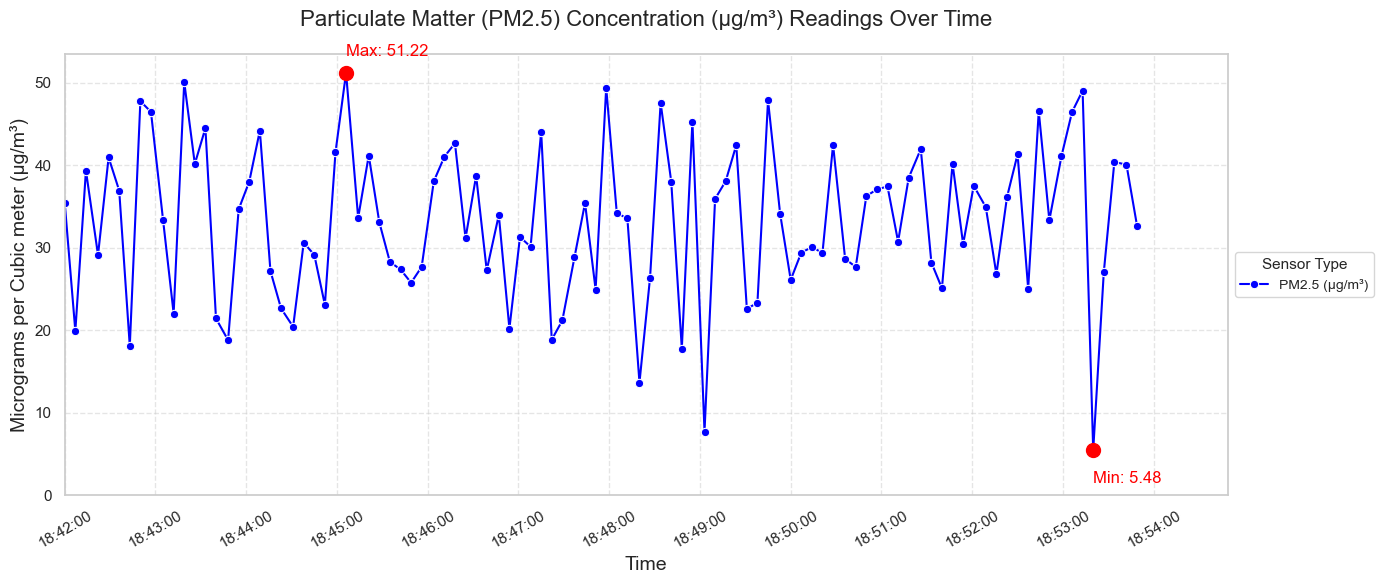

In [144]:
# Line Plot for pm25_ugm3

#Filter data type to pm25_ugm3
pm25 = "pm25_ugm3"
pm25_df = df[df["data_type"] == pm25]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pm25_df, x="timestamp", y="numeric_value", color="blue", marker="o", label="PM2.5 (μg/m³)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = pm25_df.loc[pm25_df["numeric_value"].idxmax()]
min_point = pm25_df.loc[pm25_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 2,
         f'Max: {max_point["numeric_value"]:.2f}', color="red", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 4,
         f'Min: {min_point["numeric_value"]:.2f}', color="red", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = pm25_df["timestamp"].min()
end = pm25_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = pm25_df["numeric_value"].min()
y_origin = math.floor(min_y / 20) * 20
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Particulate Matter (PM2.5) Concentration (μg/m³) Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Micrograms per Cubic meter (μg/m³)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("pm25_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

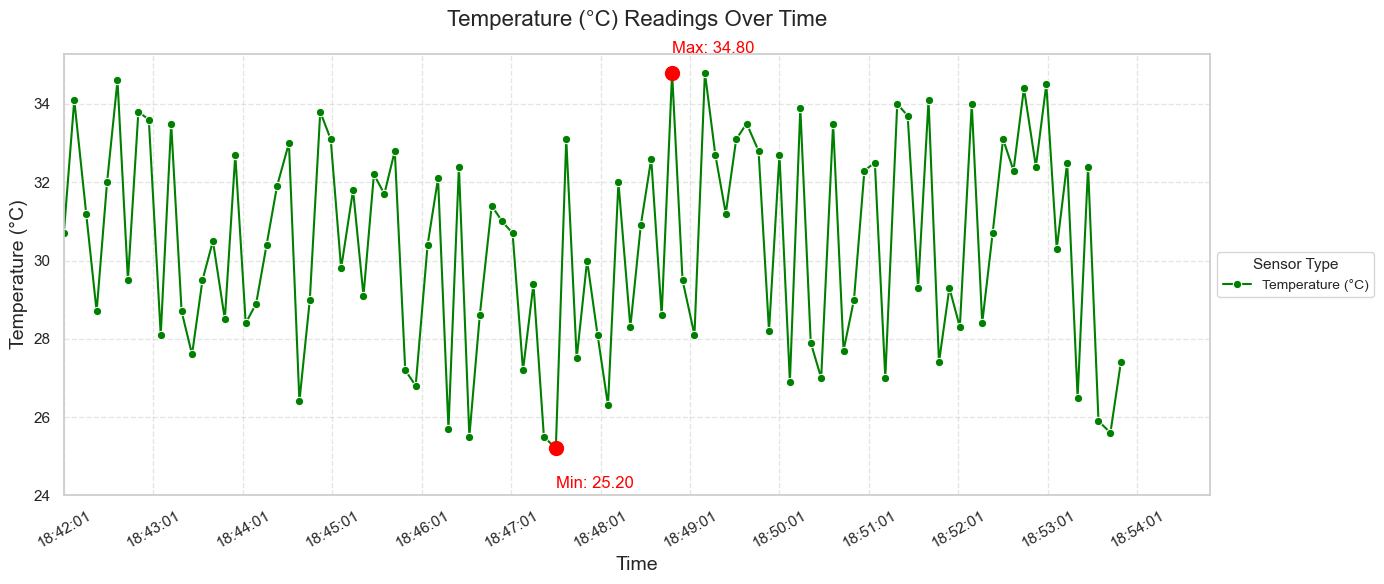

In [145]:
# Line Plot for temperature_c

#Filter data type to temperature_c
temp = "temperature_c"
temp_df = df[df["data_type"] == temp]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=temp_df, x="timestamp", y="numeric_value", color="green", marker="o", label="Temperature (°C)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = temp_df.loc[temp_df["numeric_value"].idxmax()]
min_point = temp_df.loc[temp_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 0.5,
         f'Max: {max_point["numeric_value"]:.2f}', color="red", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 1,
         f'Min: {min_point["numeric_value"]:.2f}', color="red", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = temp_df["timestamp"].min()
end = temp_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = temp_df["numeric_value"].min()
y_origin = math.floor(min_y / 2) * 2
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Temperature (°C) Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("temperature_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

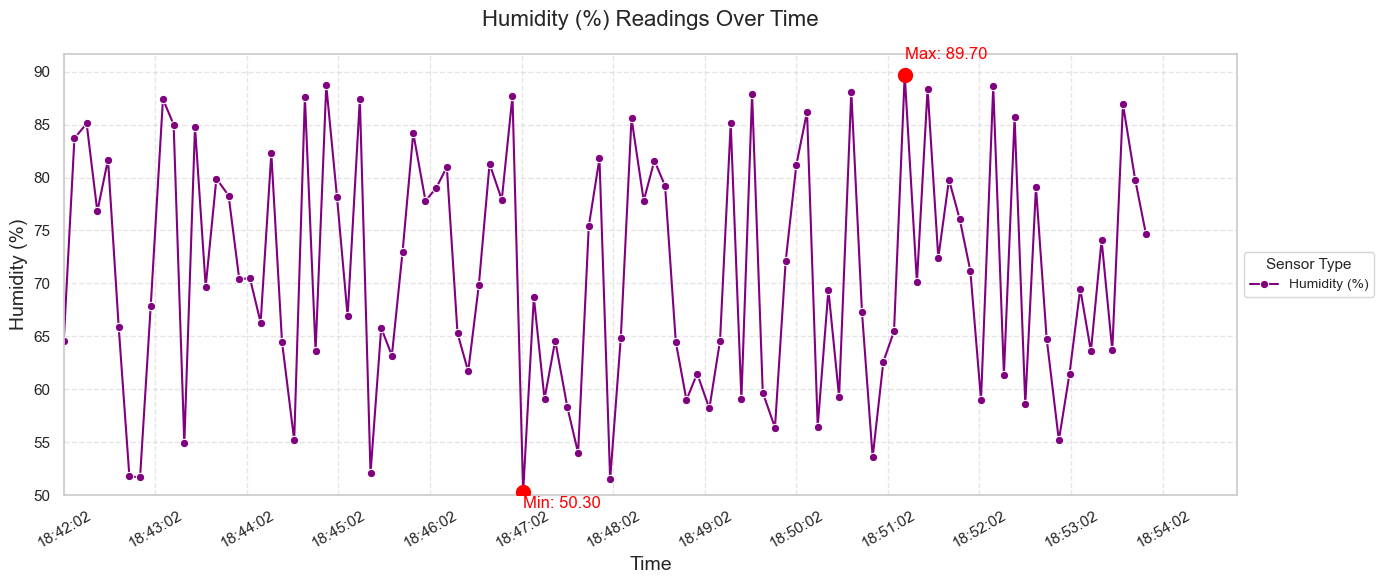

In [146]:
# Line Plot for humidity_percent

#Filter data type to humidity_percent
hum = "humidity_percent"
hum_df = df[df["data_type"] == hum]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=hum_df, x="timestamp", y="numeric_value", color="purple", marker="o", label="Humidity (%)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = hum_df.loc[hum_df["numeric_value"].idxmax()]
min_point = hum_df.loc[hum_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 1.5,
         f'Max: {max_point["numeric_value"]:.2f}', color="red", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="red", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 1.5,
         f'Min: {min_point["numeric_value"]:.2f}', color="red", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = hum_df["timestamp"].min()
end = hum_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = hum_df["numeric_value"].min()
y_origin = math.floor(min_y / 5) * 5
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Humidity (%) Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("humidity_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

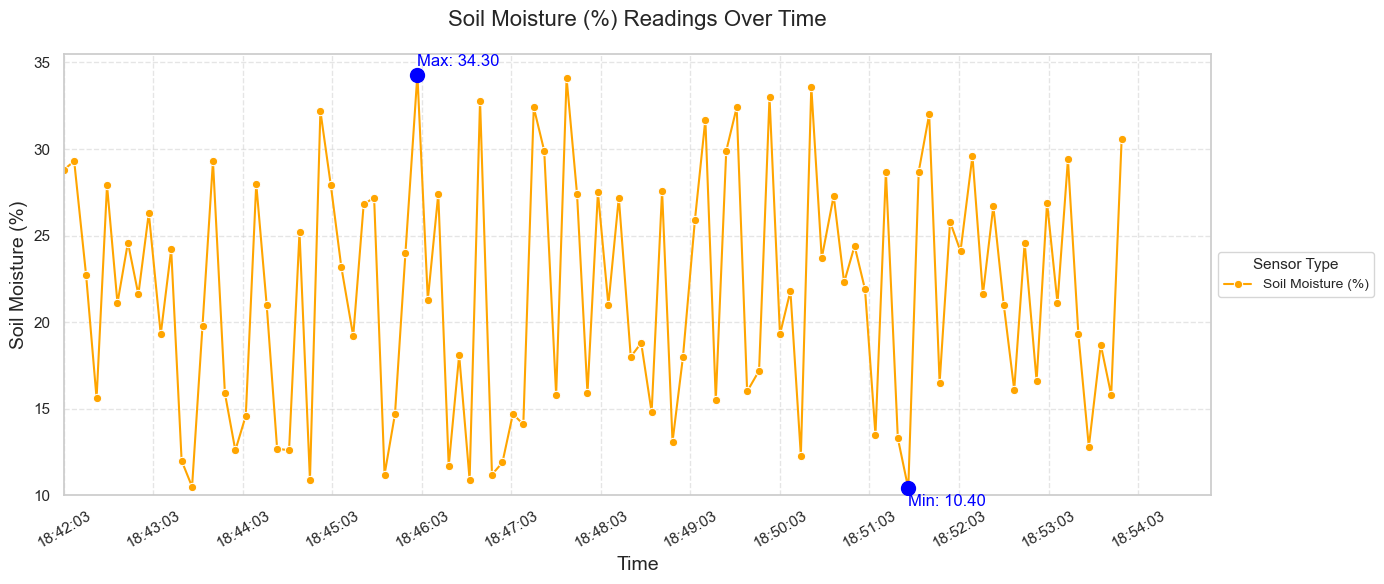

In [147]:
# Line Plot for soil_moisture_percent

#Filter data type to soil_moisture_percent
smp = "soil_moisture_percent"
smp_df = df[df["data_type"] == smp]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=smp_df, x="timestamp", y="numeric_value", color="orange", marker="o", label="Soil Moisture (%)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = smp_df.loc[smp_df["numeric_value"].idxmax()]
min_point = smp_df.loc[smp_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 0.5,
         f'Max: {max_point["numeric_value"]:.2f}', color="blue", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 1,
         f'Min: {min_point["numeric_value"]:.2f}', color="blue", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = smp_df["timestamp"].min()
end = smp_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = smp_df["numeric_value"].min()
y_origin = math.floor(min_y / 5) * 5
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Soil Moisture (%) Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Soil Moisture (%)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("soilmoisture_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

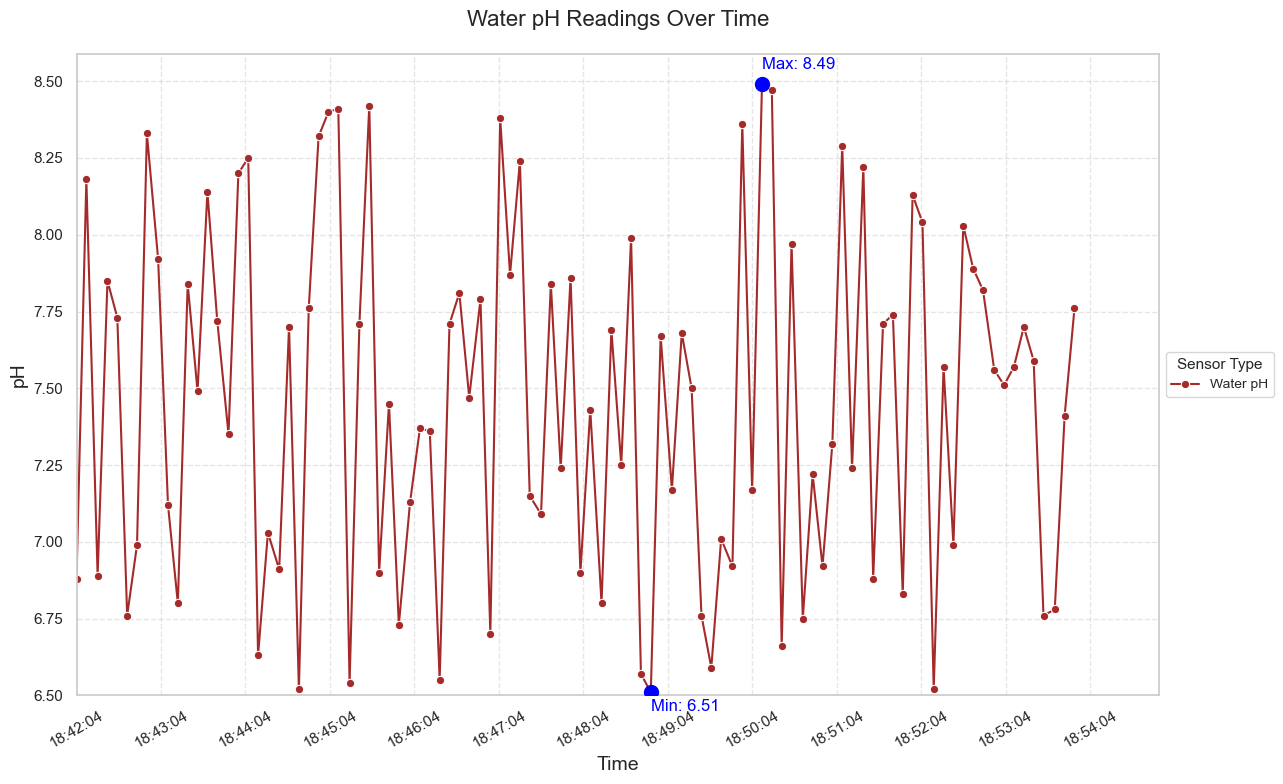

In [148]:
# Line Plot for water_ph

#Filter data type to water_ph
wph = "water_ph"
wph_df = df[df["data_type"] == wph]

# Creating a single plot
plt.figure(figsize=(13, 8))
sns.lineplot(data=wph_df, x="timestamp", y="numeric_value", color="brown", marker="o", label="Water pH")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = wph_df.loc[wph_df["numeric_value"].idxmax()]
min_point = wph_df.loc[wph_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 0.05,
         f'Max: {max_point["numeric_value"]:.2f}', color="blue", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 0.06,
         f'Min: {min_point["numeric_value"]:.2f}', color="blue", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = wph_df["timestamp"].min()
end = wph_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = wph_df["numeric_value"].min()
y_origin = math.floor(min_y / 0.25) * 0.25
plt.ylim(bottom=y_origin)

# Add title and labels
plt.title("Water pH Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("waterph_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()

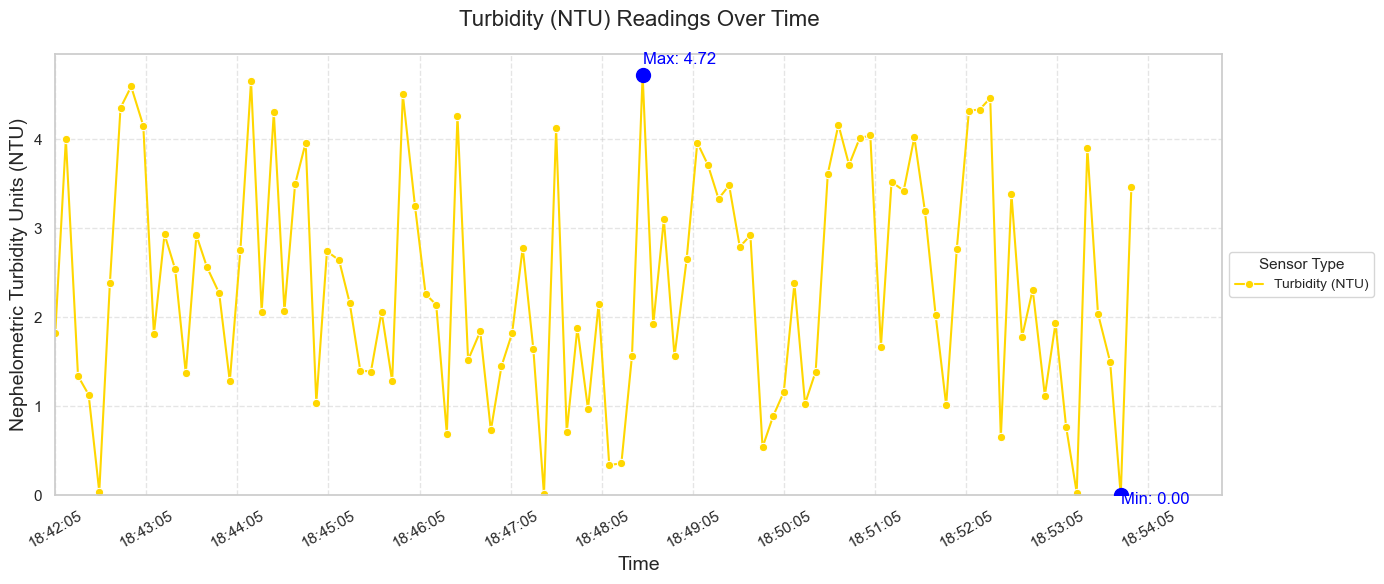

In [149]:
# Line Plot for turbidity_ntu

#Filter data type to turbidity_ntu
turb = "turbidity_ntu"
turb_df = df[df["data_type"] == turb]

# Creating a single plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=turb_df, x="timestamp", y="numeric_value", color="gold", marker="o", label="Turbidity (NTU)")

## Highlighting the highest and lowest points
# Get the highest and lowest points
max_point = turb_df.loc[turb_df["numeric_value"].idxmax()]
min_point = turb_df.loc[turb_df["numeric_value"].idxmin()]

# Highlight the highest point
plt.scatter(max_point["timestamp"], max_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(max_point["timestamp"], max_point["numeric_value"] + 0.12,
         f'Max: {max_point["numeric_value"]:.2f}', color="blue", fontsize=12)

# Highlight the lowest point
plt.scatter(min_point["timestamp"], min_point["numeric_value"], color="blue", s=100, zorder=5)
plt.text(min_point["timestamp"], min_point["numeric_value"] - 0.1,
         f'Min: {min_point["numeric_value"]:.2f}', color="blue", fontsize=12)

## Formatting x-axis
# Format the timestamp for x-axis (Month Day, newline, Hour:Minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Define exact tick positions — start with the origin
start = turb_df["timestamp"].min()
end = turb_df["timestamp"].max()

# Padding before and after for x-axis
padded_start = start - timedelta(seconds=0)
padded_end = end + timedelta(seconds=60)

# Create ticks that still start from real origin
ticks = pd.date_range(start=start, end=padded_end, freq='1min')

# Apply limits and ticks
plt.gca().set_xlim(padded_start, padded_end)
plt.gca().set_xticks(ticks)
plt.xticks(rotation=30)

## Formatting y-axis
# Find the minimum y-value and round it down to the nearest 20
min_y = turb_df["numeric_value"].min()
#y_origin = math.floor(min_y / 0.25) * 0.25
plt.ylim(bottom=min_y)

# Add title and labels
plt.title("Turbidity (NTU) Readings Over Time", fontsize=16,  pad=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Nephelometric Turbidity Units (NTU)", fontsize=14)
plt.legend(title="Sensor Type", fontsize=10, title_fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

# Additional format for the plot
plt.tight_layout()  # Prevent clipping
plt.grid(True, linestyle='--', alpha=0.5) # Grid lines for easy analysis

# Save the plot as png
plt.savefig("turb_plot.png", dpi=300)  # Saves at 300 DPI resolution

# Display the plot
plt.show()